# 230968078 Week1 Example Code

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
from sklearn.model_selection import train_test_split

In [34]:
num_samples = 1000
num_features = 10
num_classes = 2

In [36]:
x = np.random.rand(num_samples, num_features)
weights = np.array([0.8, 0.6, 0.4, 0.2, 0.1, 0, 0, 0, 0, 0])
logits = x @ weights + np.random.normal(0, 0.1, size=1000)
y = (logits > np.median(logits)).astype(int)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# numbers generated using np.random.rand are already between 0 and 1, so no need for scaling

In [42]:
model = tf.keras.Sequential([
    Dense(12, activation='relu', input_shape=(10,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (812.00 B)

 Trainable params: 203 (812.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5148 - loss: 0.6908 - val_accuracy: 0.6000 - val_loss: 0.6616
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5198 - loss: 0.6759 - val_accuracy: 0.6000 - val_loss: 0.6461
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5385 - loss: 0.6631 - val_accuracy: 0.6000 - val_loss: 0.6347
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5557 - loss: 0.6521 - val_accuracy: 0.6125 - val_loss: 0.6249
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 0.6379 - val_accuracy: 0.6375 - val_loss: 0.6162
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 0.6275 - val_accuracy: 0.6625 - val_loss: 0.6042
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6608 - loss: 0.6008 - val_accuracy: 0.6875 - val_loss: 0.5906
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6779 - loss: 0.5994 - val_accuracy: 0.6875 - val_loss

In [32]:
import matplotlib.pyplot as plt

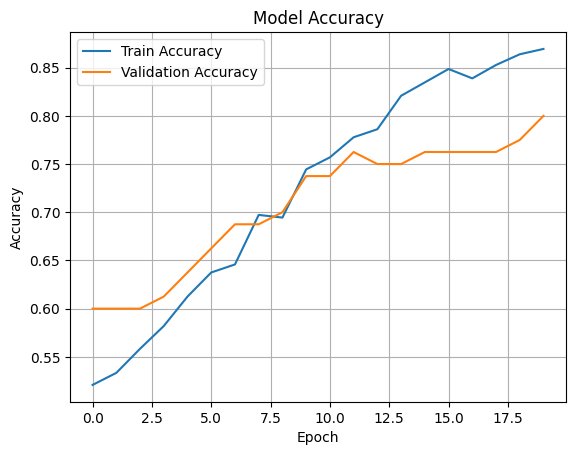

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy, loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7887 - loss: 0.4409 
0.7900000214576721 0.4366801381111145
